# Домашнее задание 1 

**Тема**: Анализ временных рядов

**Выполнил**: Фазлов Илья

**Дата**: 26.12.25

## Введение

Рассмотрим акции NVIDIA за последние 5 лет с интервалом в день

### Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy import stats
import yfinance as yf
from time import perf_counter
from dieboldmariano import dm_test
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

np.random.seed(67)


## Exploratory Data Analysis

In [26]:
nvda = yf.Ticker("NVDA")
nvda.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-11-25 00:00:00-05:00,174.900263,178.150082,169.540561,177.810104,320600300,0.00,0.0
2025-11-26 00:00:00-05:00,181.619888,182.899816,178.230078,180.249954,183852000,0.00,0.0
2025-11-28 00:00:00-05:00,179.000025,179.280009,176.490171,176.990143,121332800,0.00,0.0
2025-12-01 00:00:00-05:00,174.750272,180.289972,173.670330,179.909988,188131000,0.00,0.0
2025-12-02 00:00:00-05:00,181.749876,185.649669,179.989980,181.449905,182632200,0.00,0.0
2025-12-03 00:00:00-05:00,181.069924,182.439843,179.100033,179.580002,165138000,0.00,0.0
2025-12-04 00:00:00-05:00,181.619995,184.520004,179.960007,183.380005,167364900,0.01,0.0
2025-12-05 00:00:00-05:00,183.889999,184.660004,180.910004,182.410004,143971100,0.00,0.0
2025-12-08 00:00:00-05:00,182.639999,188.000000,182.399994,185.550003,204378100,0.00,0.0


In [29]:
df = nvda.history(period='5y', interval='1d').ffill()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-28 00:00:00-05:00,13.025869,13.025869,12.727458,12.863824,212564000,0.0,0.0
2020-12-29 00:00:00-05:00,12.888756,13.035843,12.806238,12.906955,170372000,0.0,0.0
2020-12-30 00:00:00-05:00,12.953820,13.176694,12.860583,13.108885,225396000,0.0,0.0
2020-12-31 00:00:00-05:00,13.099662,13.114121,12.878783,13.018391,192424000,0.0,0.0
2021-01-04 00:00:00-05:00,13.067500,13.614213,12.926147,13.076724,560640000,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-18 00:00:00-05:00,174.529999,176.149994,171.820007,174.139999,176096000,0.0,0.0
2025-12-19 00:00:00-05:00,176.669998,181.449997,176.339996,180.990005,324925900,0.0,0.0
2025-12-22 00:00:00-05:00,183.919998,184.160004,182.350006,183.690002,129064400,0.0,0.0


In [32]:
df.index.day

Index([28, 29, 30, 31,  4,  5,  6,  7,  8, 11,
       ...
       11, 12, 15, 16, 17, 18, 19, 22, 23, 24],
      dtype='int32', name='Date', length=1255)

## Гипотеа 1

### График стоимоти акций во времени

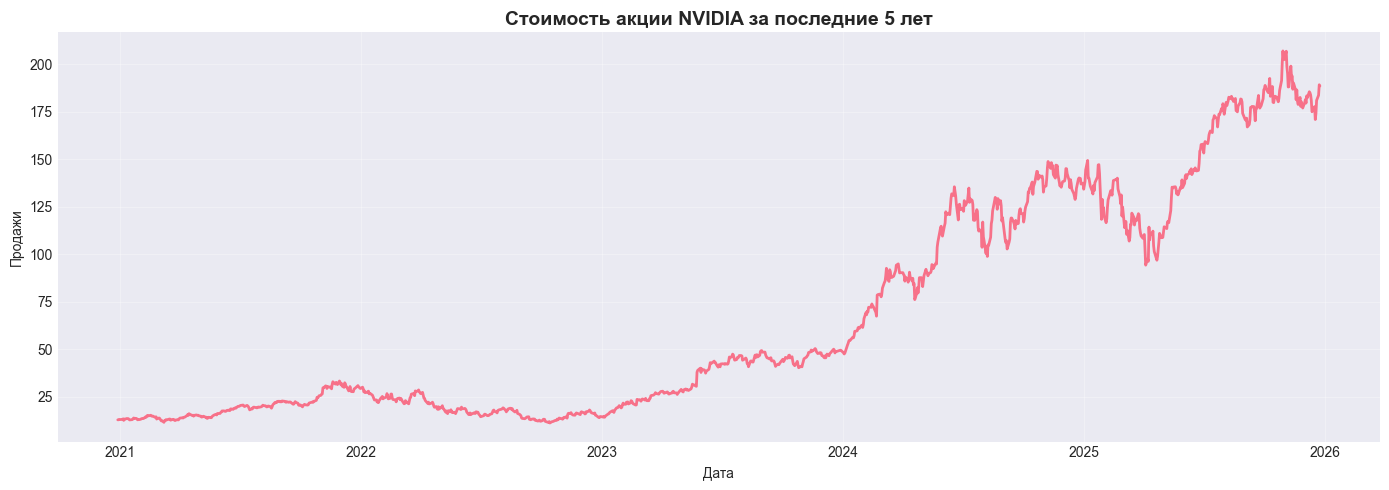

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Close'], linewidth=2)
plt.title('Стоимость акции NVIDIA за последние 5 лет', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Декомпозиция

Для декомпозиции дневного ряда цен использован период period=252 (среднему числу торговых дней в году). 

Визуальный анализ декомпозиции показывает, что при таком period тренд имеет гладкий график, а сезонный компонент имеет устойчивый годовой паттерн, остатки становятся менее структурированными

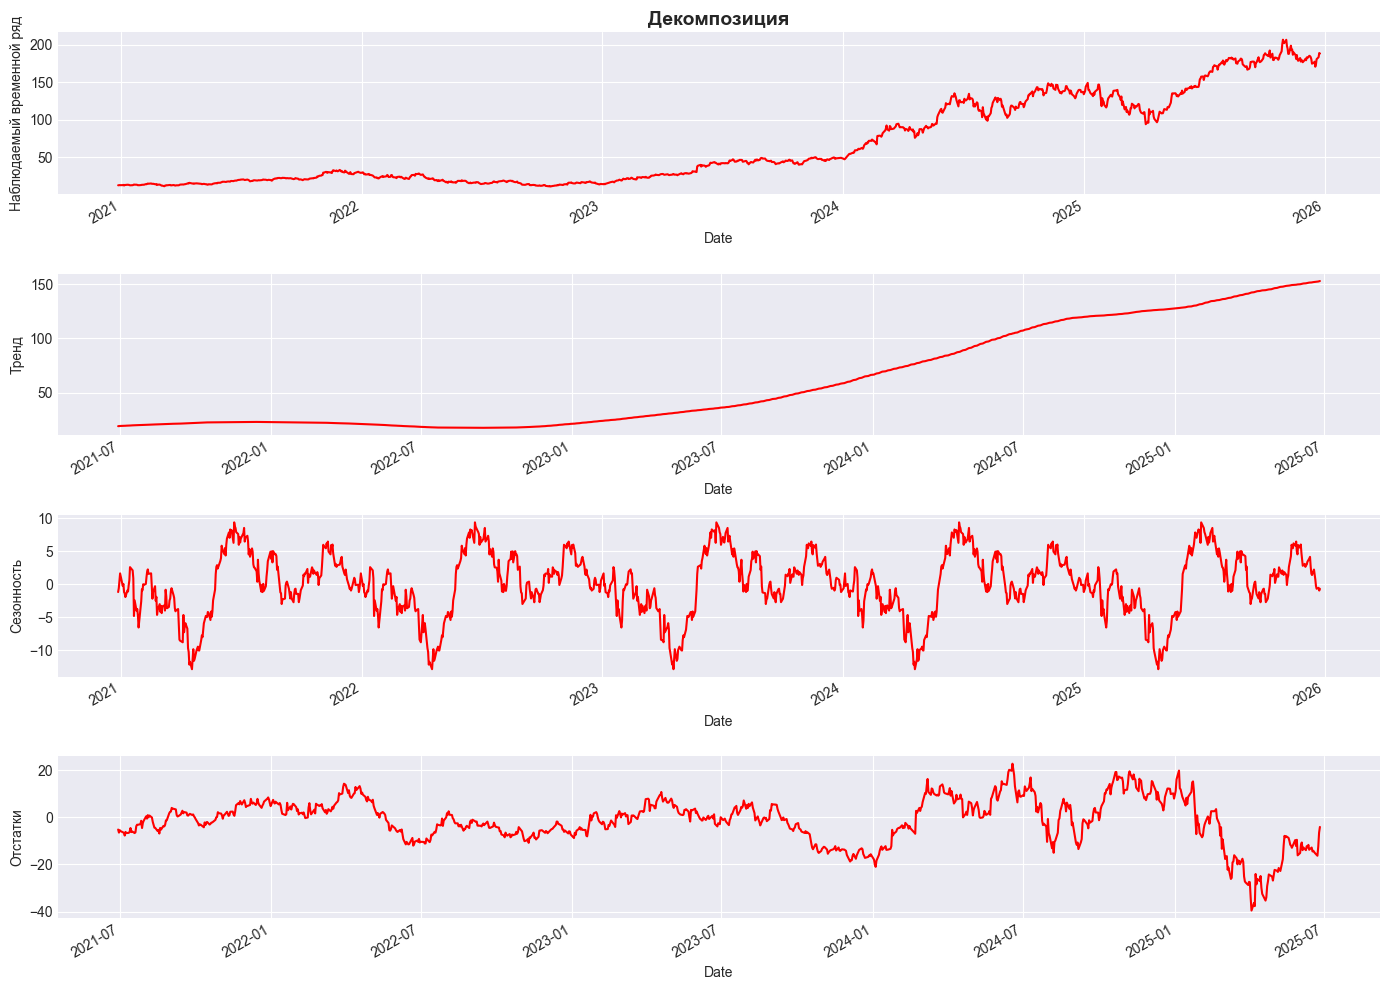

In [329]:
deco = seasonal_decompose(df['Close'], model='additive', period=252)

fig, axes = plt.subplots(4, 1, figsize=(14, 10))

deco.observed.plot(ax=axes[0], color='red')
axes[0].set_ylabel('Наблюдаемый временной ряд')
axes[0].set_title('Декомпозиция', fontsize=14, fontweight='bold')

deco.trend.plot(ax=axes[1], color='red')
axes[1].set_ylabel('Тренд')


deco.seasonal.plot(ax=axes[2], color='red')
axes[2].set_ylabel('Сезонность')


deco.resid.plot(ax=axes[3], color='red')
axes[3].set_ylabel('Отстатки')

plt.tight_layout()
plt.show()

### Построим ACF/PACF

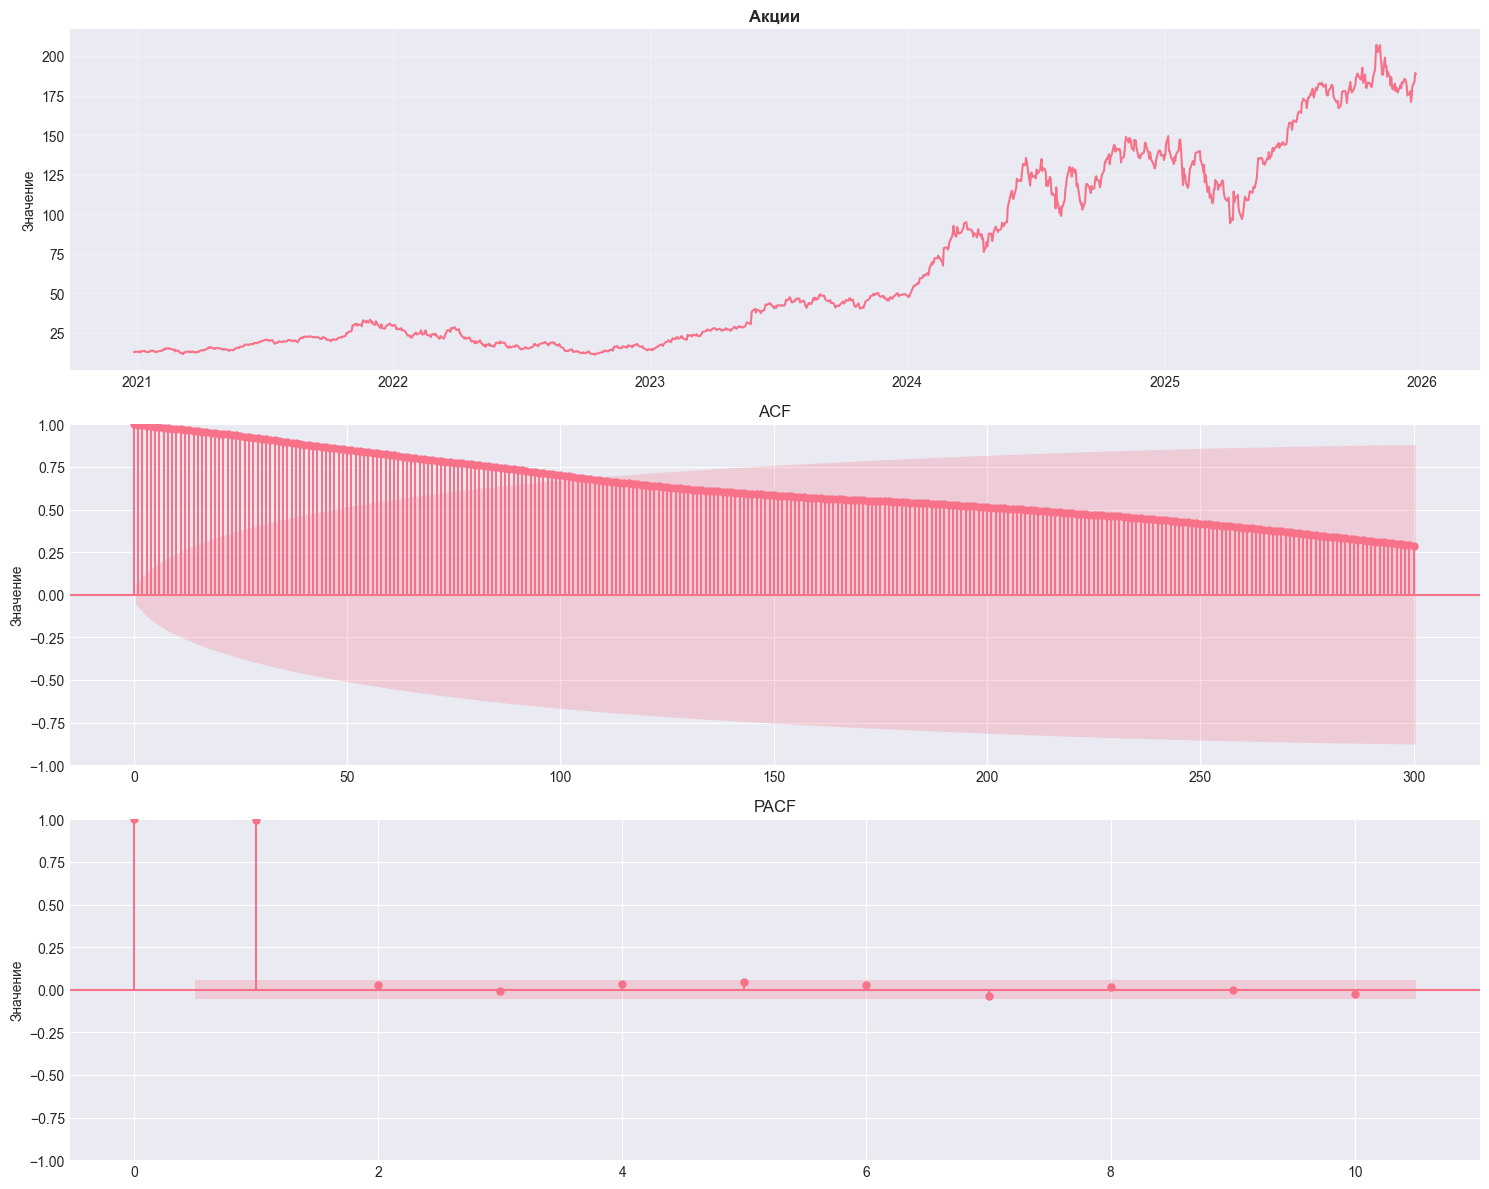

In [211]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

process = df.Close

axes[0].plot(process)
axes[0].set_title('Акции', fontweight='bold')
axes[0].set_ylabel("Значение")
axes[0].grid(alpha=0.3)

plot_acf(process, lags=300, ax=axes[1], alpha=0.05)
axes[1].set_ylabel("Значение")
axes[1].set_title(f'ACF')

plot_pacf(process, lags=10, ax=axes[2], alpha=0.05)
axes[2].set_ylabel("Значение")
axes[2].set_title(f'PACF')


plt.tight_layout()
plt.show()

По результатам разложений можно заметить, что график ACF затухает, а PACF - обрезается на 2 лаге, следовательно можно сделать вывод, что мы наблюжаем AR(2) процесс

### Статистические тесты

In [140]:
def test_stationarity(series, name='Series'):
    print(f"\n{'='*60}")
    print(f"Тесты стационарности: {name}")
    print('='*60)

    adf_result = adfuller(series.dropna())
    print(f"\nADF Test:")
    print(f"  Статистика: {adf_result[0]:.4f}")
    print(f"  p-value: {adf_result[1]:.4f}")
    print(f"  Критические значения: {adf_result[4]}")
    print(f"  Вывод: {'СТАЦИОНАРЕН' if adf_result[1] < 0.05 else 'НЕСТАЦИОНАРЕН'}")

    kpss_result = kpss(series.dropna(), regression='ct')
    print(f"\nKPSS Test:")
    print(f"  Статистика: {kpss_result[0]:.4f}")
    print(f"  p-value: {kpss_result[1]:.4f}")
    print(f"  Критические значения: {kpss_result[3]}")
    print(f"  Вывод: {'СТАЦИОНАРЕН' if kpss_result[1] > 0.05 else 'НЕСТАЦИОНАРЕН'}")
    print('='*60)

    return adf_result[1], kpss_result[1]

In [141]:
test_stationarity(df['Close'], 'Исходный ряд')


Тесты стационарности: Исходный ряд

ADF Test:
  Статистика: 0.6015
  p-value: 0.9877
  Критические значения: {'1%': np.float64(-3.435660336370594), '5%': np.float64(-2.863885022214541), '10%': np.float64(-2.568018522153254)}
  Вывод: НЕСТАЦИОНАРЕН

KPSS Test:
  Статистика: 1.2016
  p-value: 0.0100
  Критические значения: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
  Вывод: НЕСТАЦИОНАРЕН


(np.float64(0.987653165402579), np.float64(0.01))

Визуально видно, что мы имеем дело с нестационарным рядом из-за выраженного тренда, что и подтверждается соглосованностью тестов на стационарность.

### Приведение к стационарности

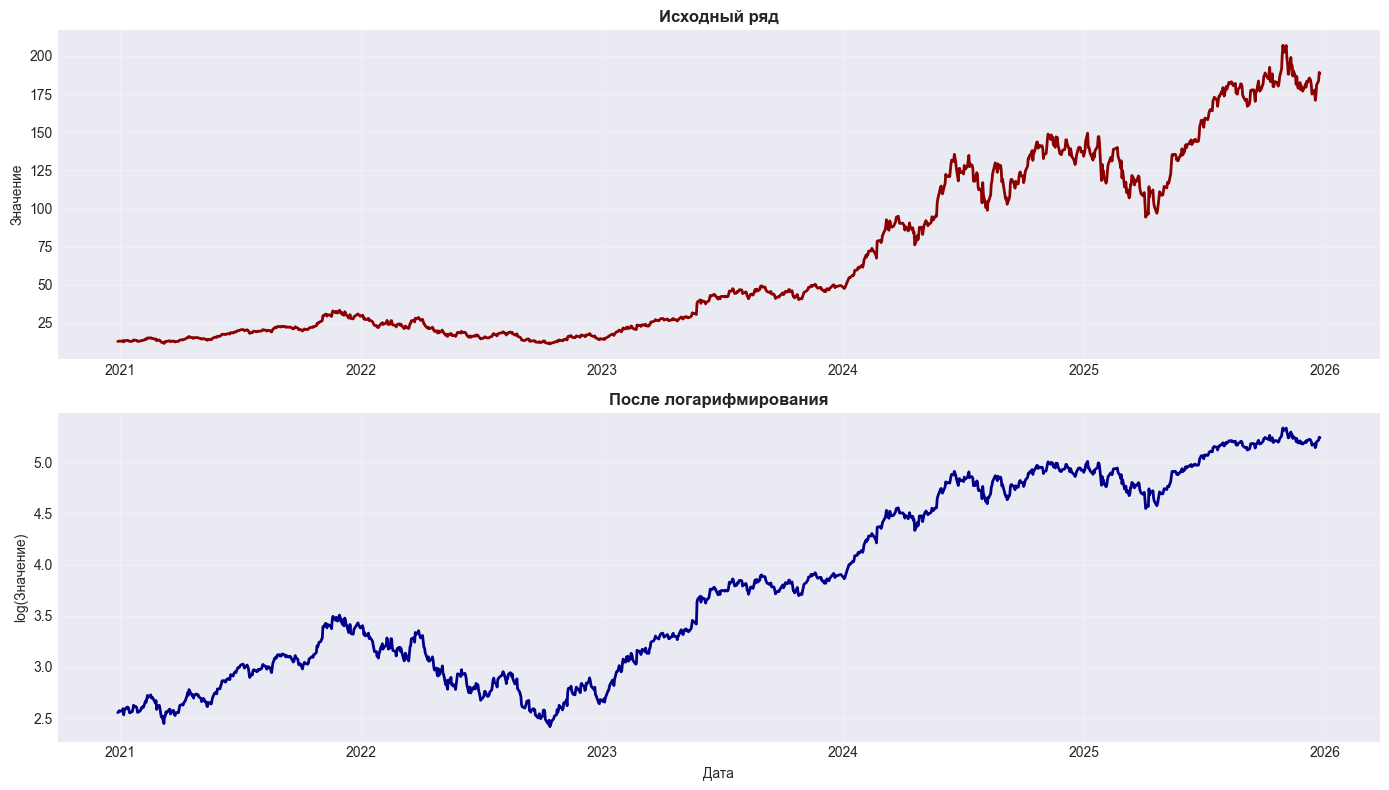


Тесты стационарности: После логарифмирования

ADF Test:
  Статистика: -0.3284
  p-value: 0.9214
  Критические значения: {'1%': np.float64(-3.4355796466416777), '5%': np.float64(-2.863849421064024), '10%': np.float64(-2.5679995625056926)}
  Вывод: НЕСТАЦИОНАРЕН

KPSS Test:
  Статистика: 0.7597
  p-value: 0.0100
  Критические значения: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
  Вывод: НЕСТАЦИОНАРЕН


(np.float64(0.9213845025621225), np.float64(0.01))

In [142]:
data = pd.DataFrame({'close': df['Close'], 'log': np.log(df['Close'])}, index=df.index)

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(data.index, data['close'], linewidth=2, color='darkred')
axes[0].set_title('Исходный ряд', fontweight='bold')
axes[0].set_ylabel('Значение')
axes[0].grid(alpha=0.3)

axes[1].plot(data.index, data['log'], linewidth=2, color='darkblue')
axes[1].set_title('После логарифмирования', fontweight='bold')
axes[1].set_ylabel('log(Значение)')
axes[1].set_xlabel('Дата')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

test_stationarity(data['log'], 'После логарифмирования')

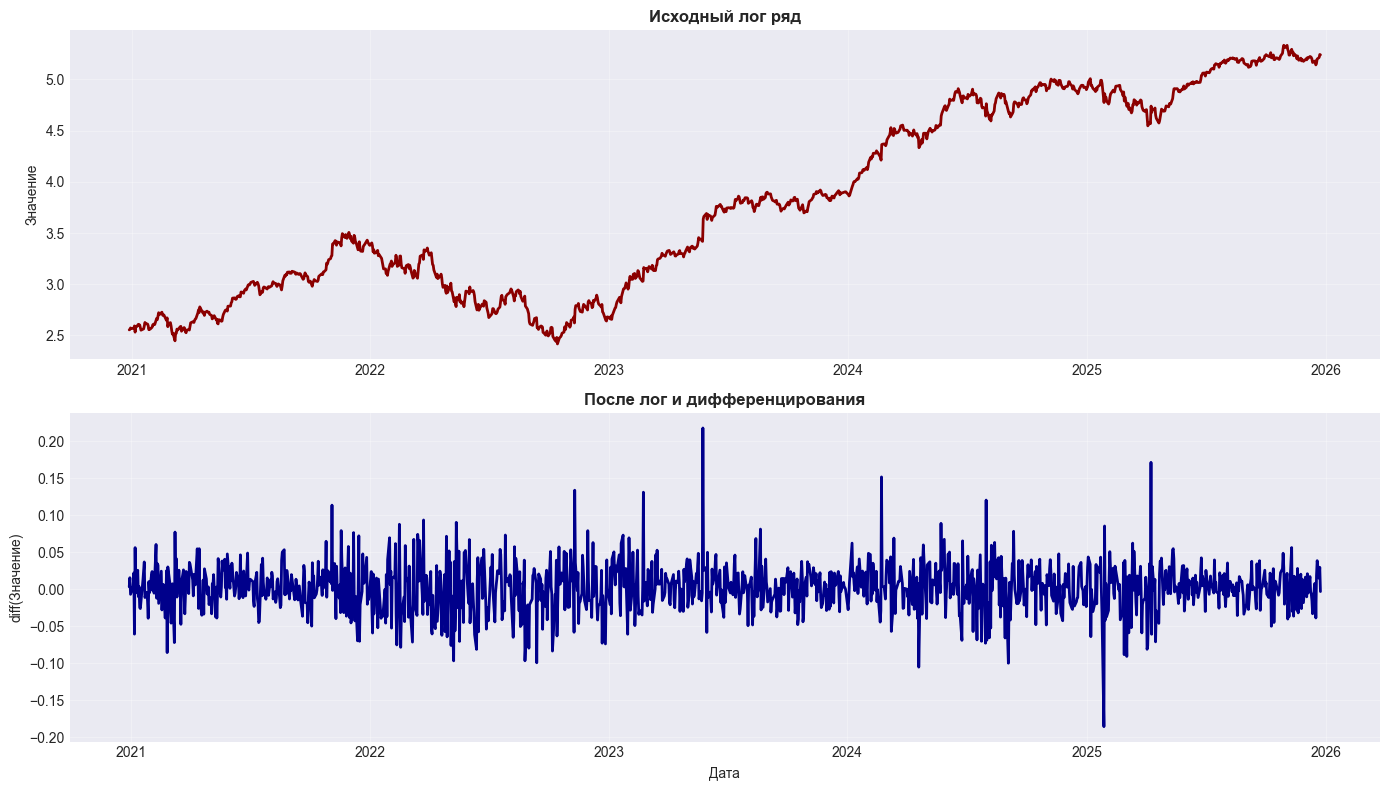


Тесты стационарности: После дифференцирования

ADF Test:
  Статистика: -37.0875
  p-value: 0.0000
  Критические значения: {'1%': np.float64(-3.4355796466416777), '5%': np.float64(-2.863849421064024), '10%': np.float64(-2.5679995625056926)}
  Вывод: СТАЦИОНАРЕН

KPSS Test:
  Статистика: 0.0896
  p-value: 0.1000
  Критические значения: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
  Вывод: СТАЦИОНАРЕН


(0.0, np.float64(0.1))

In [143]:
data['diff'] = data['log'].diff()

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

axes[0].plot(data.index, data['log'], linewidth=2, color='darkred')
axes[0].set_title('Исходный лог ряд', fontweight='bold')
axes[0].set_ylabel('Значение')
axes[0].grid(alpha=0.3)

axes[1].plot(data.index, data['diff'], linewidth=2, color='darkblue')
axes[1].set_title('После лог и дифференцирования', fontweight='bold')
axes[1].set_ylabel('diff(Значение)')
axes[1].set_xlabel('Дата')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

test_stationarity(data['diff'], 'После дифференцирования')

In [144]:
data.dropna(inplace=True)
data['diff']

Date
2020-12-29 00:00:00-05:00    0.003347
2020-12-30 00:00:00-05:00    0.015524
2020-12-31 00:00:00-05:00   -0.006927
2021-01-04 00:00:00-05:00    0.004471
2021-01-05 00:00:00-05:00    0.021967
                               ...   
2025-12-18 00:00:00-05:00    0.018547
2025-12-19 00:00:00-05:00    0.038582
2025-12-22 00:00:00-05:00    0.014808
2025-12-23 00:00:00-05:00    0.029608
2025-12-24 00:00:00-05:00   -0.003176
Name: diff, Length: 1254, dtype: float64

### Обучение моделей

#### Разделение выборки

In [145]:
train_size = int(len(data) * 0.8)
train = data.iloc[:train_size]
test = data.iloc[train_size:]
train.shape, test.shape

((1003, 3), (251, 3))

In [146]:
train.head()

,close,log,diff
Date,,,
2020-12-29 00:00:00-05:00,12.906955,2.557766,0.003347
2020-12-30 00:00:00-05:00,13.108885,2.573290,0.015524
2020-12-31 00:00:00-05:00,13.018391,2.566363,-0.006927
2021-01-04 00:00:00-05:00,13.076724,2.570834,0.004471
2021-01-05 00:00:00-05:00,13.367157,2.592801,0.021967


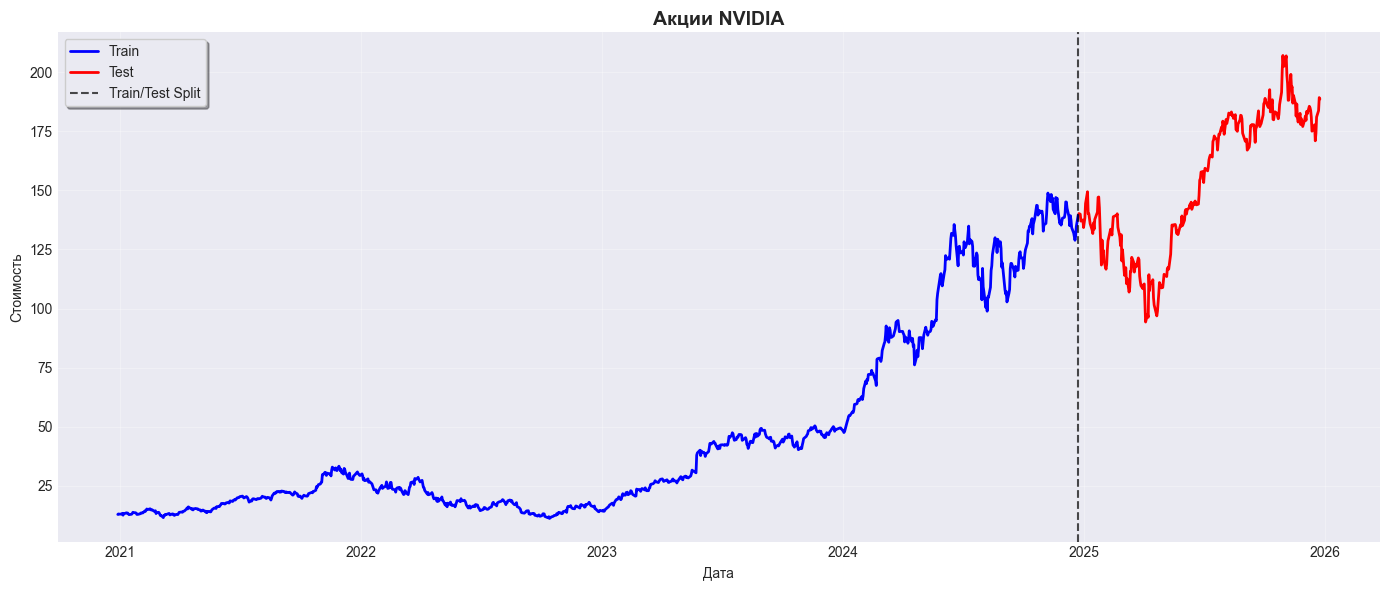

In [147]:
plt.figure(figsize=(14, 6))
plt.plot(train.index, train['close'], label='Train', linewidth=2, color='blue')
plt.plot(test.index, test['close'], label='Test', linewidth=2, color='red')
plt.axvline(train.index[-1], color='black', linestyle='--', alpha=0.7, label='Train/Test Split')
plt.title('Акции NVIDIA', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Стоимость')
plt.legend(frameon=True, shadow=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [295]:
h = len(test)
y_test = test['close']
y_prev = train['close'].iloc[-1]
last_log = train['log'].iloc[-1]

In [296]:
def fit_forecast(train_y, h, trend=None, seasonal=None, seasonal_periods=None):
    model = ExponentialSmoothing(train_y, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    fit = model.fit(optimized=True)
    return fit.forecast(h)

def naive_forecast(train, h):
    return pd.Series(np.full(h, train.iloc[-1]), index=test.index)

#### Baseline (Naive Forecast)

In [297]:
naive = naive_forecast(train['close'], h)

#### Simple Exponential Smoothing (SES)

In [298]:
non_stat_ses = fit_forecast(train['close'], h, trend=None, seasonal=None)
stat_ses = fit_forecast(train['diff'], h, trend=None, seasonal=None)

#### Метод Хольта (Holt's Linear Trend)

In [299]:
non_stat_holt = fit_forecast(train['close'], h, trend='add', seasonal=None)
stat_holt = fit_forecast(train['diff'], h, trend=None, seasonal=None)

#### Holt-Winters

In [306]:
non_stat_hw = fit_forecast(train['close'], h, trend='add', seasonal='add', seasonal_periods=252)
stat_hw = fit_forecast(train['diff'], h, trend=None, seasonal='add', seasonal_periods=252)

#### Восстановление предсказаний

In [307]:
def recover_func(pred_r, last_log_y, index=None):
    pred_r = pd.Series(pred_r).reset_index(drop=True)
    logs = last_log_y + pred_r.cumsum()
    y_hat = np.exp(logs)
    if index is not None:
        y_hat.index = index
    return y_hat


In [308]:
recov_stat_ses = recover_func(stat_ses, last_log, index=test.index)
recov_stat_holt = recover_func(stat_holt, last_log, index=test.index)
recov_stat_hw = recover_func(stat_hw, last_log, index=test.index)

### Визуализация прогнозов

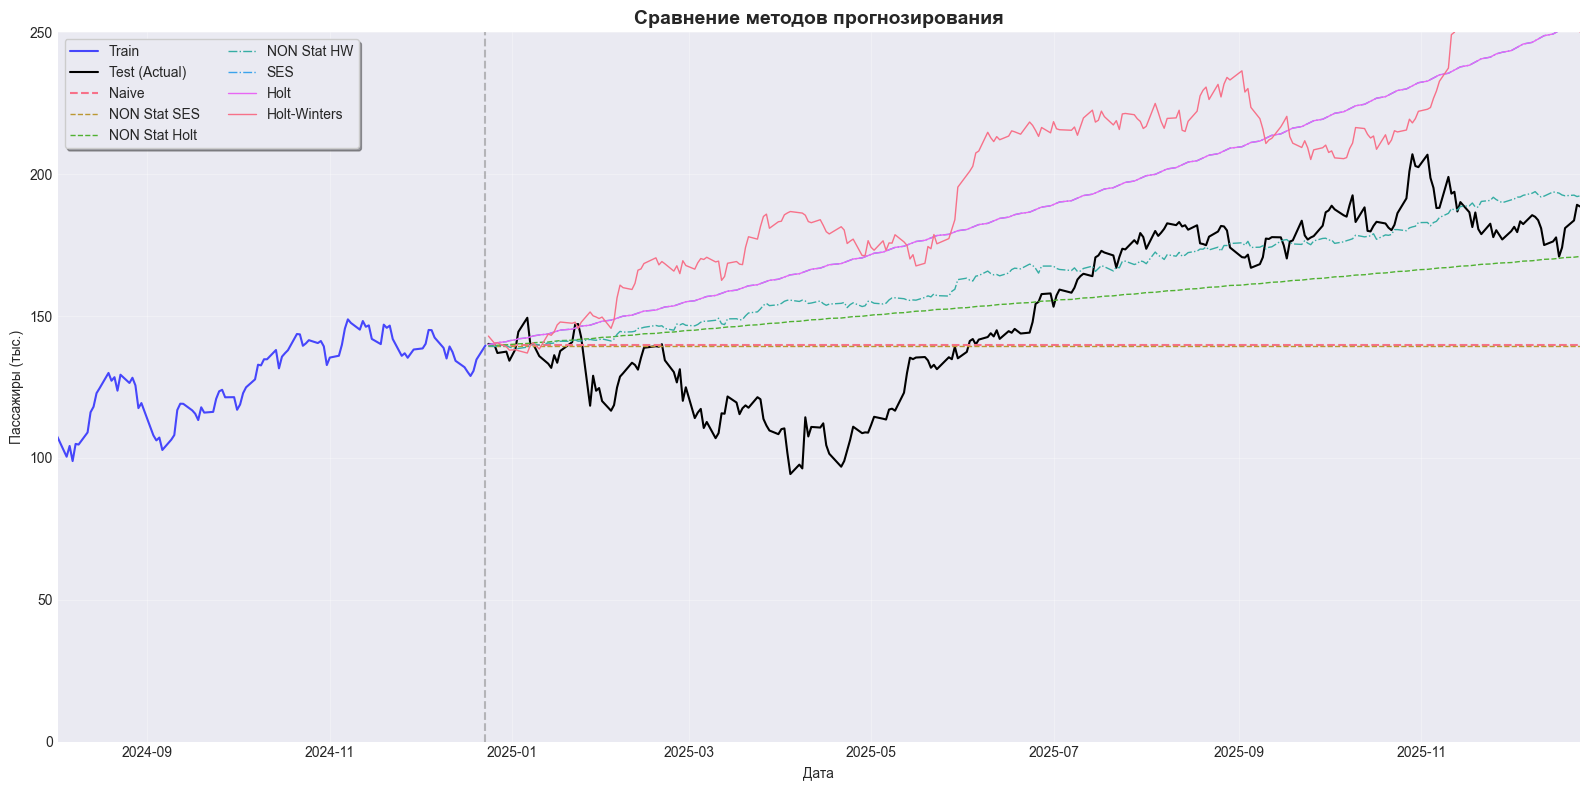

In [309]:
plt.figure(figsize=(16, 8))

plt.plot(train.index, train['close'], label='Train', color='blue', alpha=0.7)
plt.plot(test.index, test['close'], label='Test (Actual)', color='black')

plt.plot(test.index, naive, label='Naive', linestyle='--')

plt.plot(test.index, non_stat_ses, label='NON Stat SES', linewidth=1, linestyle='--')
plt.plot(test.index, non_stat_holt, label='NON Stat Holt', linewidth=1, linestyle='--')
plt.plot(test.index, non_stat_hw, label='NON Stat HW', linewidth=1, linestyle='-.')

if recov_stat_ses is not None:
    plt.plot(test.index, recov_stat_ses, label='SES', linewidth=1, linestyle='-.')
if recov_stat_holt is not None:
    plt.plot(test.index, recov_stat_holt, label='Holt', linewidth=1)
if recov_stat_hw is not None:
    plt.plot(test.index, recov_stat_hw, label='Holt-Winters', linewidth=1)

plt.axvline(train.index[-1], color='gray', linestyle='--', alpha=0.5)
plt.title('Сравнение методов прогнозирования', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Пассажиры (тыс.)')
plt.ylim(0, 250)
plt.xlim(train.index[-100], test.index[-1])
plt.legend(loc='upper left', frameon=True, shadow=True, ncol=2)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Оценка качества

In [358]:
def mae(y_true, y_pred):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mape(y_true, y_pred):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def directional_accuracy(y_true, y_pred, y_prev_last_train):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    correct = 0
    for i in range(len(y_true)):
        prev = y_prev_last_train if i == 0 else y_true[i-1]
        correct += (np.sign(y_true[i] - prev) == np.sign(y_pred[i] - prev))
    return correct / len(y_true)

def metrics_pack(y_true, y_pred, y_prev_last_train):
    return {
        "MAE": mae(y_true, y_pred),
        "RMSE": rmse(y_true, y_pred),
        "MAPE": mape(y_true, y_pred),
        "DA": directional_accuracy(y_true, y_pred, y_prev_last_train),
    }

In [319]:
results = {
    "Naive": metrics_pack(y_test, naive, y_prev),
    "SES": metrics_pack(y_test, non_stat_ses, y_prev),
    "SES (stat)": metrics_pack(y_test, recov_stat_ses, y_prev),
    "Holt": metrics_pack(y_test, non_stat_holt, y_prev),
    "Holt (stat)": metrics_pack(y_test, recov_stat_holt, y_prev),
    "HW": metrics_pack(y_test, non_stat_hw, y_prev),
    "HW (stat)": metrics_pack(y_test, recov_stat_hw, y_prev),
}

results_df = pd.DataFrame(results).T
results_df = results_df.round(3)
results_df = results_df.sort_values('RMSE')

print('\n' + '='*60)
print('РЕЗУЛЬТАТЫ СРАВНЕНИЯ МОДЕЛЕЙ')
print('='*60)
print(results_df.to_string())
print('='*60)


РЕЗУЛЬТАТЫ СРАВНЕНИЯ МОДЕЛЕЙ
                MAE    RMSE    MAPE     DA
HW           16.652  22.183  13.060  0.554
Holt         18.992  22.417  13.787  0.522
Naive        27.723  32.313  17.773  0.498
SES          27.788  32.433  17.784  0.502
SES (stat)   38.290  42.095  26.508  0.538
Holt (stat)  38.290  42.095  26.508  0.538
HW (stat)    47.887  52.765  33.282  0.534


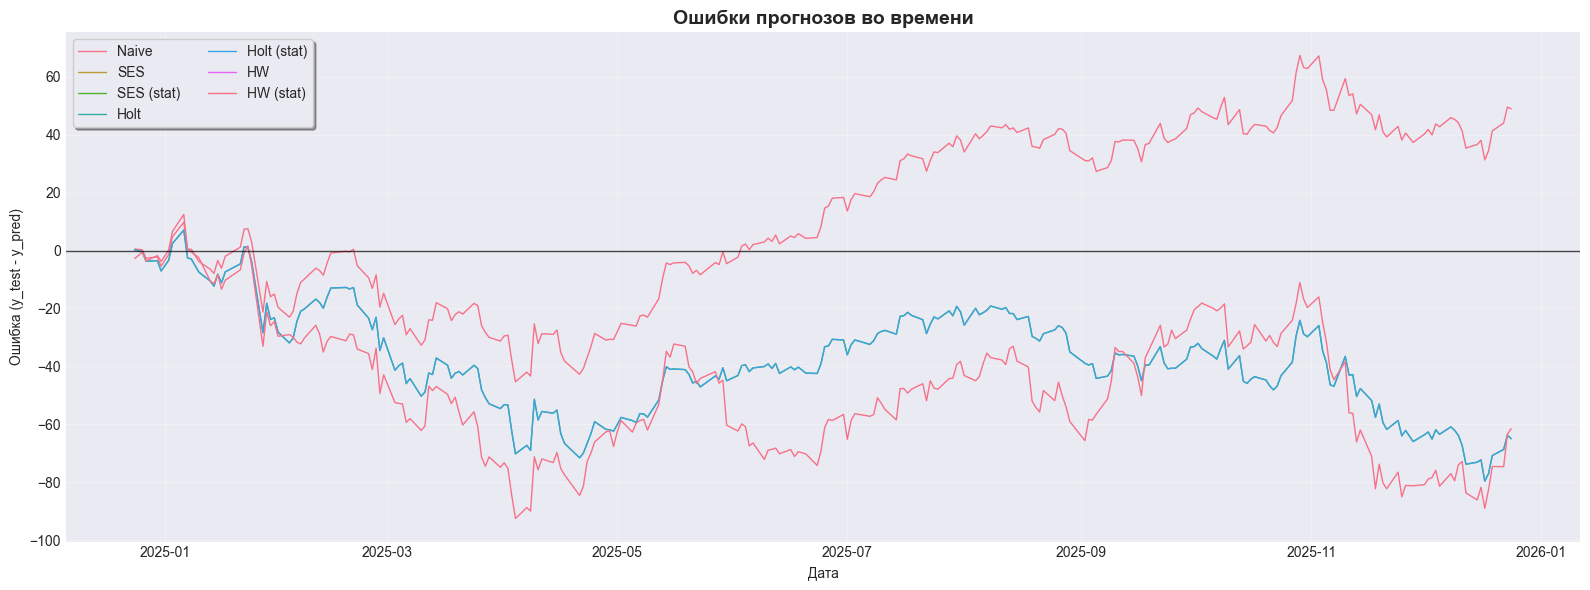

In [ ]:
errors = pd.DataFrame({
    'Naive':           y_test - naive,
    'SES':  y_test - non_stat_ses,
    'SES (stat)':      y_test - recov_stat_ses,
    'Holt': y_test - non_stat_holt,
    'Holt (stat)':     y_test - recov_stat_holt,
    'HW':   y_test - non_stat_hw,
    'HW (stat)':       y_test - recov_stat_hw,
}, index=test.index)

plt.figure(figsize=(16, 6))
for col in errors.columns:
    plt.plot(errors.index, errors[col], label=col, linewidth=1)

plt.axhline(0, color='black', linewidth=1, alpha=0.7)
plt.title('Ошибки прогнозов во времени', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Ошибка (y_test - y_pred)')
plt.legend(loc='upper left', ncol=2, frameon=True, shadow=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

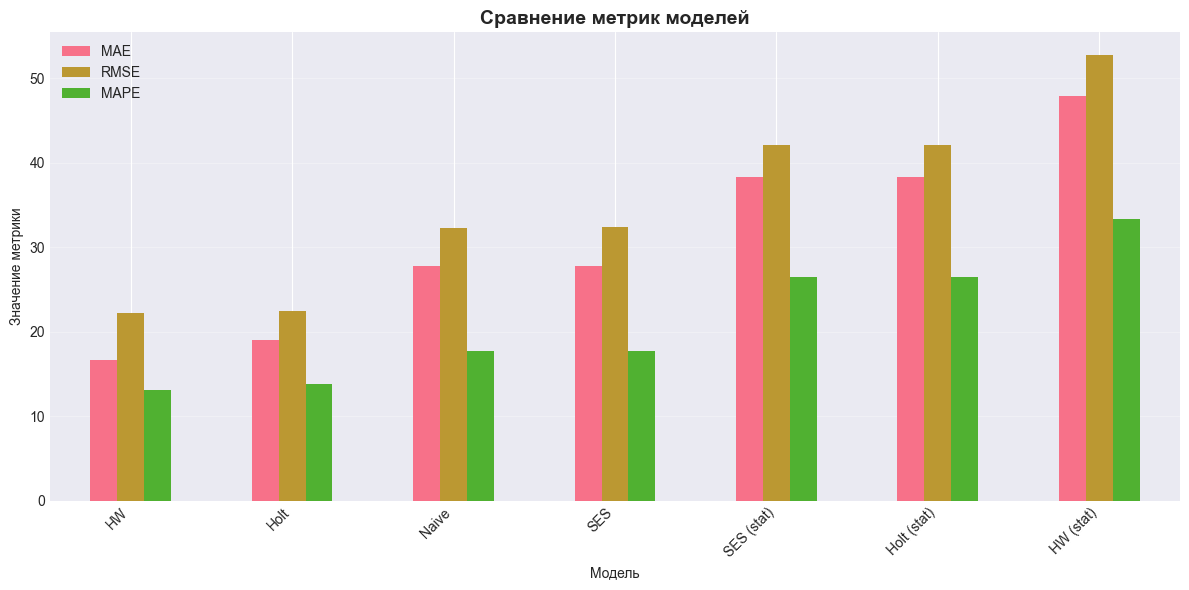

In [323]:
metrics_to_plot = ['MAE', 'RMSE', 'MAPE']

plt.figure(figsize=(10, 6))
results_df[metrics_to_plot].plot(kind='bar')
plt.title('Сравнение метрик моделей', fontsize=14, fontweight='bold')
plt.xlabel('Модель')
plt.ylabel('Значение метрики')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
for name, p1, p2 in [
    ("SES", non_stat_ses, recov_stat_ses),
    ("Holt", non_stat_holt, recov_stat_holt),
    ("HW", non_stat_hw, recov_stat_hw),
]:
    t_stat, p_val = dm_test(y_test, p1, p2)
    print(f"DM {name}: t={t_stat:.3f}, p={p_val:.4f}")

DM SES: t=-7.696, p=0.0000
DM Holt: t=-16.161, p=0.0000
DM HW: t=-19.837, p=0.0000


Вывод: согласно тесту Diebold–Mariano для всех трёх моделей различия между прогнозами на исходном и стационаризованном ряде статистически значимы, причём модели, обученные на исходных ценах, показывают существенно лучшую точность. Следовательно, гипотеза о том, что обучение на стационаризованном ряде улучшает качество прогнозов, в данных NVDA `отвергается`.

## Гипотеза 2

### Обучение различных стратегий

In [ ]:
def direct_forecast(train_y, test_index, model_cfg):
    h = len(test_index)
    pred = fit_forecast(train_y, h, **model_cfg)
    pred.index = test_index
    return pred

def rolling_forecast(train_y, test_y, k, model_cfg):
    preds = []
    cur_train = train_y.copy()

    n = len(test_y)
    for start in range(0, n, k):
        h = min(k, n - start)

        pred_block = fit_forecast(cur_train, h, **model_cfg)
        preds.append(pred_block.to_numpy())

        cur_train = pd.concat([cur_train, test_y.iloc[start:start+h]])

    pred = np.concatenate(preds)
    return pd.Series(pred, index=test_y.index)

In [360]:
y_train = train["close"]
y_test  = test["close"]
last_train_y = y_train.iloc[-1]

In [366]:
model_configs = {
    "SES": dict(trend=None, seasonal=None, seasonal_periods=None),
    "Holt": dict(trend="add", seasonal=None, seasonal_periods=None),
    "HW": dict(trend="add", seasonal="add", seasonal_periods=252),
}

In [ ]:
ks = [1, 2, 5, 10]

results = {}
preds_store = {}

for mname, cfg in model_configs.items():

    t0 = perf_counter()
    p_dir = direct_forecast(y_train, y_test.index, cfg)
    t_dir = perf_counter() - t0
    results[(mname, "Direct")] = (metrics_pack(y_test, p_dir, last_train_y), t_dir)
    preds_store[(mname, "Direct")] = p_dir


    for k in ks:
        t0 = perf_counter()
        p_roll = rolling_forecast(y_train, y_test, k, cfg)
        t_roll = perf_counter() - t0
        results[(mname, f"Rolling k={k}")] = (metrics_pack(y_test, p_roll, last_train_y), t_roll)
        preds_store[(mname, f"Rolling k={k}")] = p_roll


for (m, strat), (mets, sec) in results.items():
    s = f"{m} | {strat} | time={sec:.3f}s | "
    s += ", ".join([f"{k}={v:.4f}" if k != "MAPE_%" else f"{k}={v:.2f}" for k, v in mets.items()])
    print(s)

SES | Direct | time=0.017s | MAE=27.7883, RMSE=32.4333, MAPE=17.7837, DA=0.5020
SES | Rolling k=1 | time=0.895s | MAE=3.1328, RMSE=4.2753, MAPE=2.1697, DA=0.5498
SES | Rolling k=2 | time=0.543s | MAE=3.7930, RMSE=5.0658, MAPE=2.6136, DA=0.5498
SES | Rolling k=5 | time=0.188s | MAE=5.6228, RMSE=7.1946, MAPE=3.9311, DA=0.5339
SES | Rolling k=10 | time=0.141s | MAE=7.3521, RMSE=9.5040, MAPE=5.3033, DA=0.5498
Holt | Direct | time=0.026s | MAE=18.9922, RMSE=22.4167, MAPE=13.7871, DA=0.5219
Holt | Rolling k=1 | time=5.825s | MAE=3.1229, RMSE=4.2720, MAPE=2.1636, DA=0.5259
Holt | Rolling k=2 | time=2.722s | MAE=3.7857, RMSE=5.0652, MAPE=2.6114, DA=0.5538
Holt | Rolling k=5 | time=1.159s | MAE=5.6020, RMSE=7.1936, MAPE=3.9185, DA=0.5378
Holt | Rolling k=10 | time=0.572s | MAE=7.2340, RMSE=9.4940, MAPE=5.2327, DA=0.5578
HW | Direct | time=0.338s | MAE=16.6515, RMSE=22.1829, MAPE=13.0600, DA=0.5538
HW | Rolling k=1 | time=95.566s | MAE=3.2163, RMSE=4.4257, MAPE=2.2196, DA=0.5219
HW | Rolling k=2

### Сравнительный анализ 

#### Таблица сравнения 

In [ ]:
header = f"{'Стратегия':<10} {'Период k':<10} {'MAE':>10} {'RMSE':>10} {'DA (%)':>10} {'Время (с)':>10}"
line = "-" * len(header)

print("\nТаблица сравнения:\n")
print(header)
print(line)

for (m, strat), (mets, sec) in results.items():
    mae_val   = mets.get('MAE', float('nan'))
    rmse_val  = mets.get('RMSE', float('nan'))
    da_val    = mets.get('DA', float('nan')) * 100
    row = f"{m:<10} {strat:<10} {mae_val:>10.2f} {rmse_val:>10.2f} {da_val:>10.2f} {sec:>10.3f}"
    print(row)

print(line)


Таблица сравнения:

Стратегия  Период k          MAE       RMSE     DA (%)  Время (с)
-----------------------------------------------------------------
SES        Direct          27.79      32.43      50.20      0.017
SES        Rolling k=1       3.13       4.28      54.98      0.895
SES        Rolling k=2       3.79       5.07      54.98      0.543
SES        Rolling k=5       5.62       7.19      53.39      0.188
SES        Rolling k=10       7.35       9.50      54.98      0.141
Holt       Direct          18.99      22.42      52.19      0.026
Holt       Rolling k=1       3.12       4.27      52.59      5.825
Holt       Rolling k=2       3.79       5.07      55.38      2.722
Holt       Rolling k=5       5.60       7.19      53.78      1.159
Holt       Rolling k=10       7.23       9.49      55.78      0.572
HW         Direct          16.65      22.18      55.38      0.338
HW         Rolling k=1       3.22       4.43      52.19     95.566
HW         Rolling k=2       3.96       5.28

#### Графики

##### Прогнозы всех стратегий

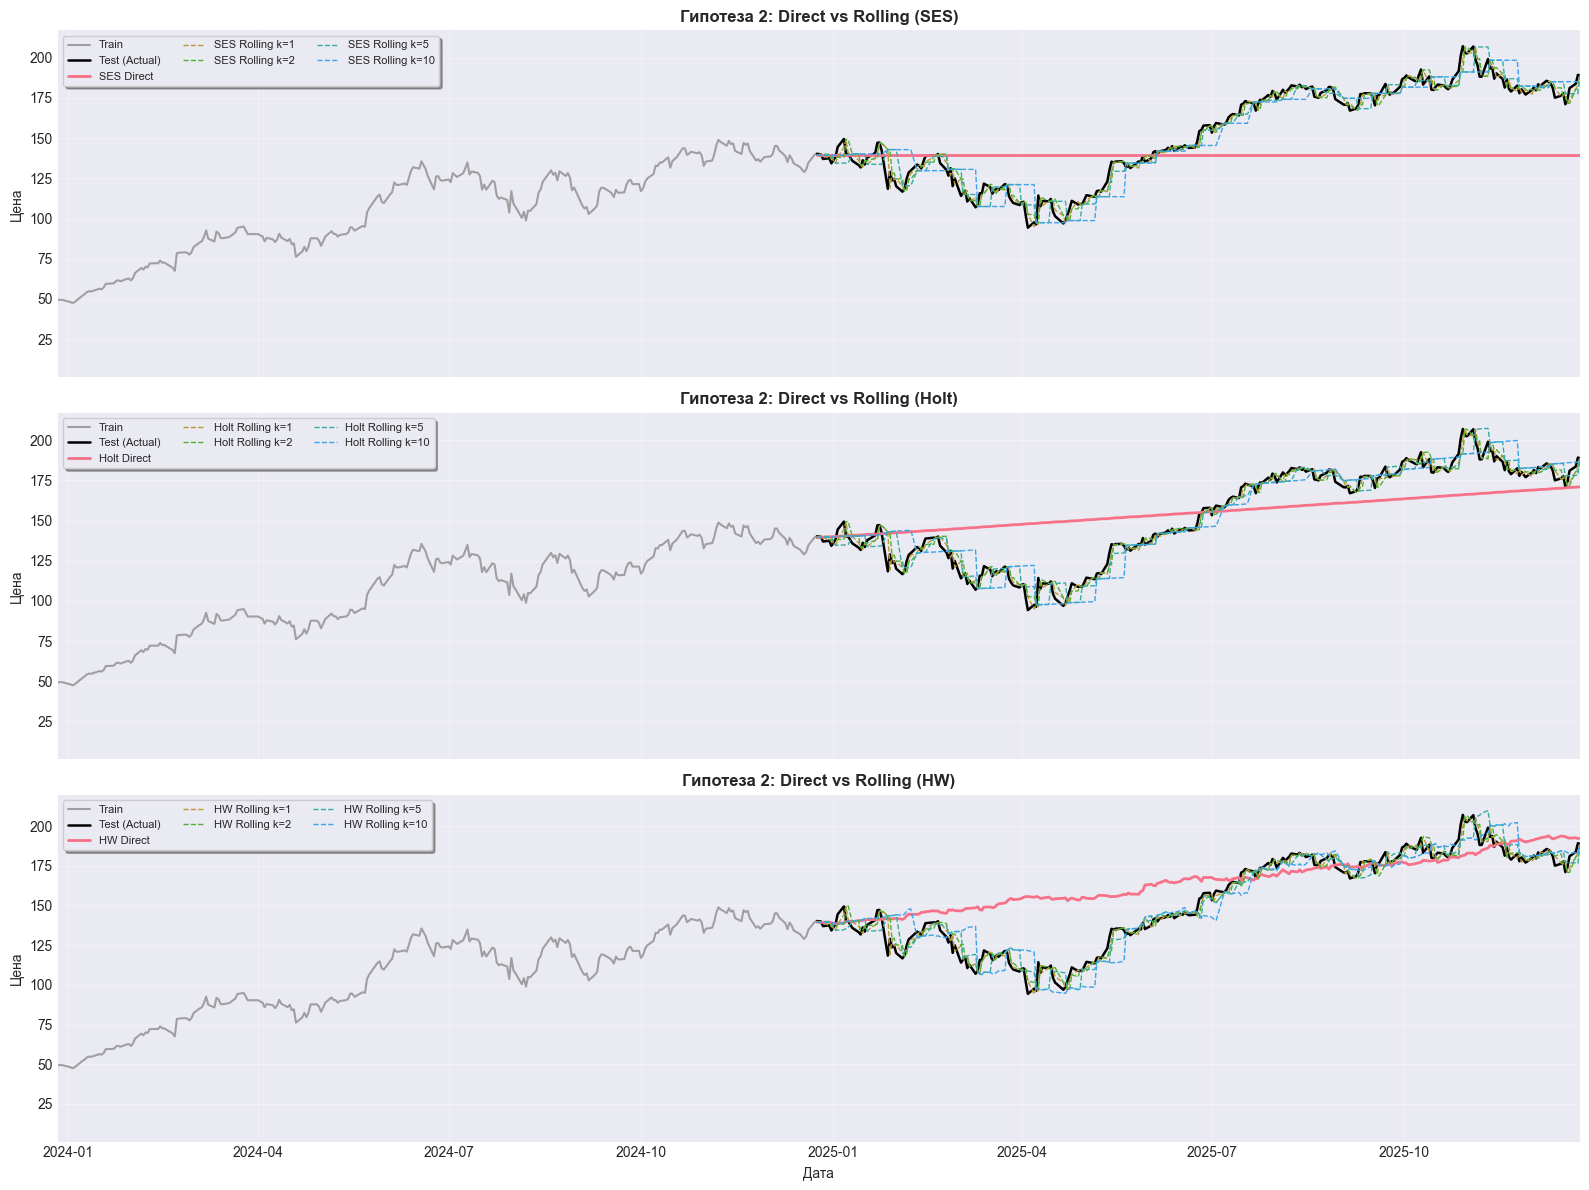

In [426]:
models = ["SES", "Holt", "HW"]
ks = [1, 2, 5, 10]

fig, axes = plt.subplots(len(models), 1, figsize=(16, 12), sharex=True)

for ax, m in zip(axes, models):

    ax.plot(y_train.index, y_train, label="Train", color="gray", linewidth=1.5, alpha=0.7)
    ax.plot(y_test.index,  y_test,  label="Test (Actual)", color="black", linewidth=1.8)


    ax.plot(
        y_test.index,
        preds_store[(m, "Direct")],
        label=f"{m} Direct",
        linewidth=2,
    )


    for k in ks:
        ax.plot(
            y_test.index,
            preds_store[(m, f"Rolling k={k}")],
            label=f"{m} Rolling k={k}",
            linewidth=1,
            linestyle="--",
        )

    ax.set_title(f"Гипотеза 2: Direct vs Rolling ({m})", fontsize=12, fontweight="bold")
    ax.set_ylabel("Цена")
    ax.set_xlim(y_train.index[-250], y_test.index[-1])
    ax.grid(alpha=0.3)
    ax.legend(loc="upper left", ncol=3, fontsize=8, frameon=True, shadow=True)

axes[-1].set_xlabel("Дата")
plt.tight_layout()
plt.show()


##### MAE vs период переобучения

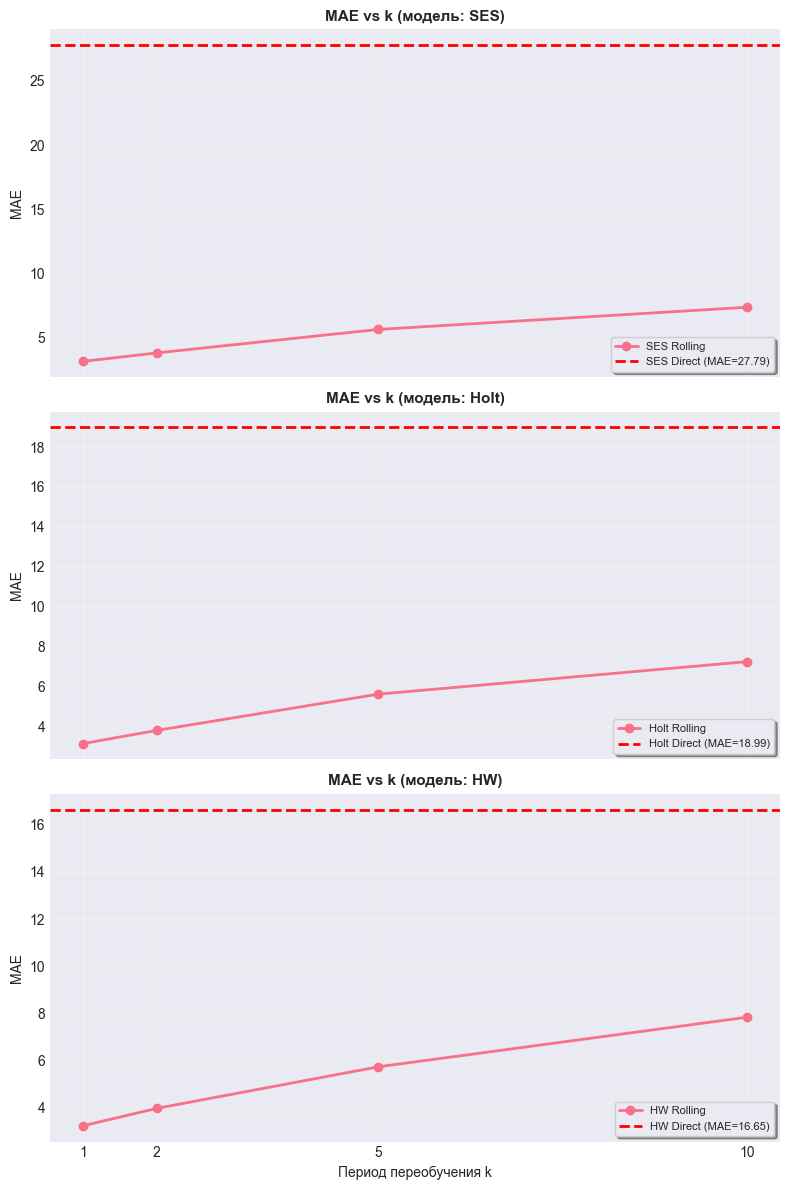

In [ ]:
models = ['SES', 'Holt', 'HW']
ks = [1, 2, 5, 10]

fig, axes = plt.subplots(len(models), 1, figsize=(8, 12), sharex=True)

for ax, m in zip(axes, models):
    mae_direct = results[(m, "Direct")][0]['MAE']
    mae_roll = [results[(m, f"Rolling k={k}")][0]['MAE'] for k in ks]

    ax.plot(ks, mae_roll, marker='o', linewidth=2, label=f'{m} Rolling')

    ax.axhline(mae_direct, color='red', linestyle='--',
               linewidth=2, label=f'{m} Direct (MAE={mae_direct:.2f})')

    ax.set_title(f'MAE vs k (модель: {m})', fontsize=11, fontweight='bold')
    ax.set_ylabel('MAE')
    ax.grid(alpha=0.3)
    ax.legend(frameon=True, shadow=True, fontsize=8)

axes[-1].set_xlabel('Период переобучения k')
axes[-1].set_xticks(ks)

plt.tight_layout()
plt.show()

##### Время выполнения vs период переобучения

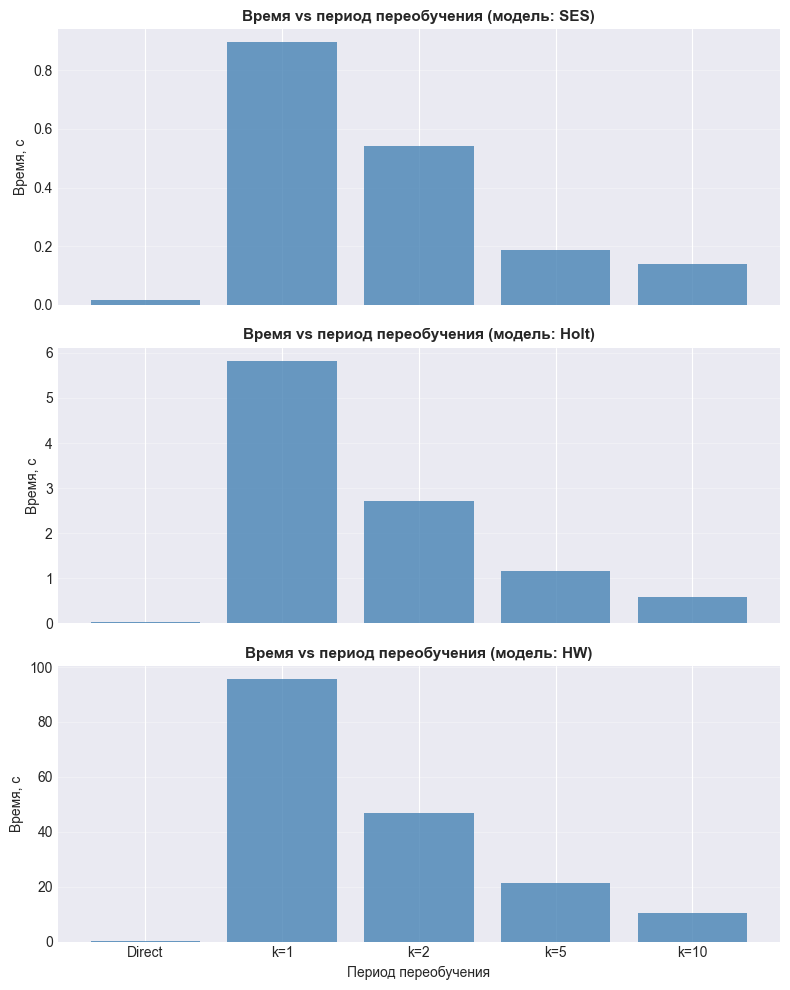

In [ ]:
models = ['SES', 'Holt', 'HW']
ks = [1, 2, 5, 10]

fig, axes = plt.subplots(len(models), 1, figsize=(8, 10), sharex=True)

for ax, m in zip(axes, models):
    labels = ['Direct'] + [f'k={k}' for k in ks]
    times = [results[(m, "Direct")][1]] + [
        results[(m, f"Rolling k={k}")][1] for k in ks
    ]

    ax.bar(labels, times, color='steelblue', alpha=0.8)
    ax.set_title(f'Время vs период переобучения (модель: {m})',
                 fontsize=11, fontweight='bold')
    ax.set_ylabel('Время, с')
    ax.grid(axis='y', alpha=0.3)

axes[-1].set_xlabel('Период переобучения')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### Абсолютная ошибка по дням

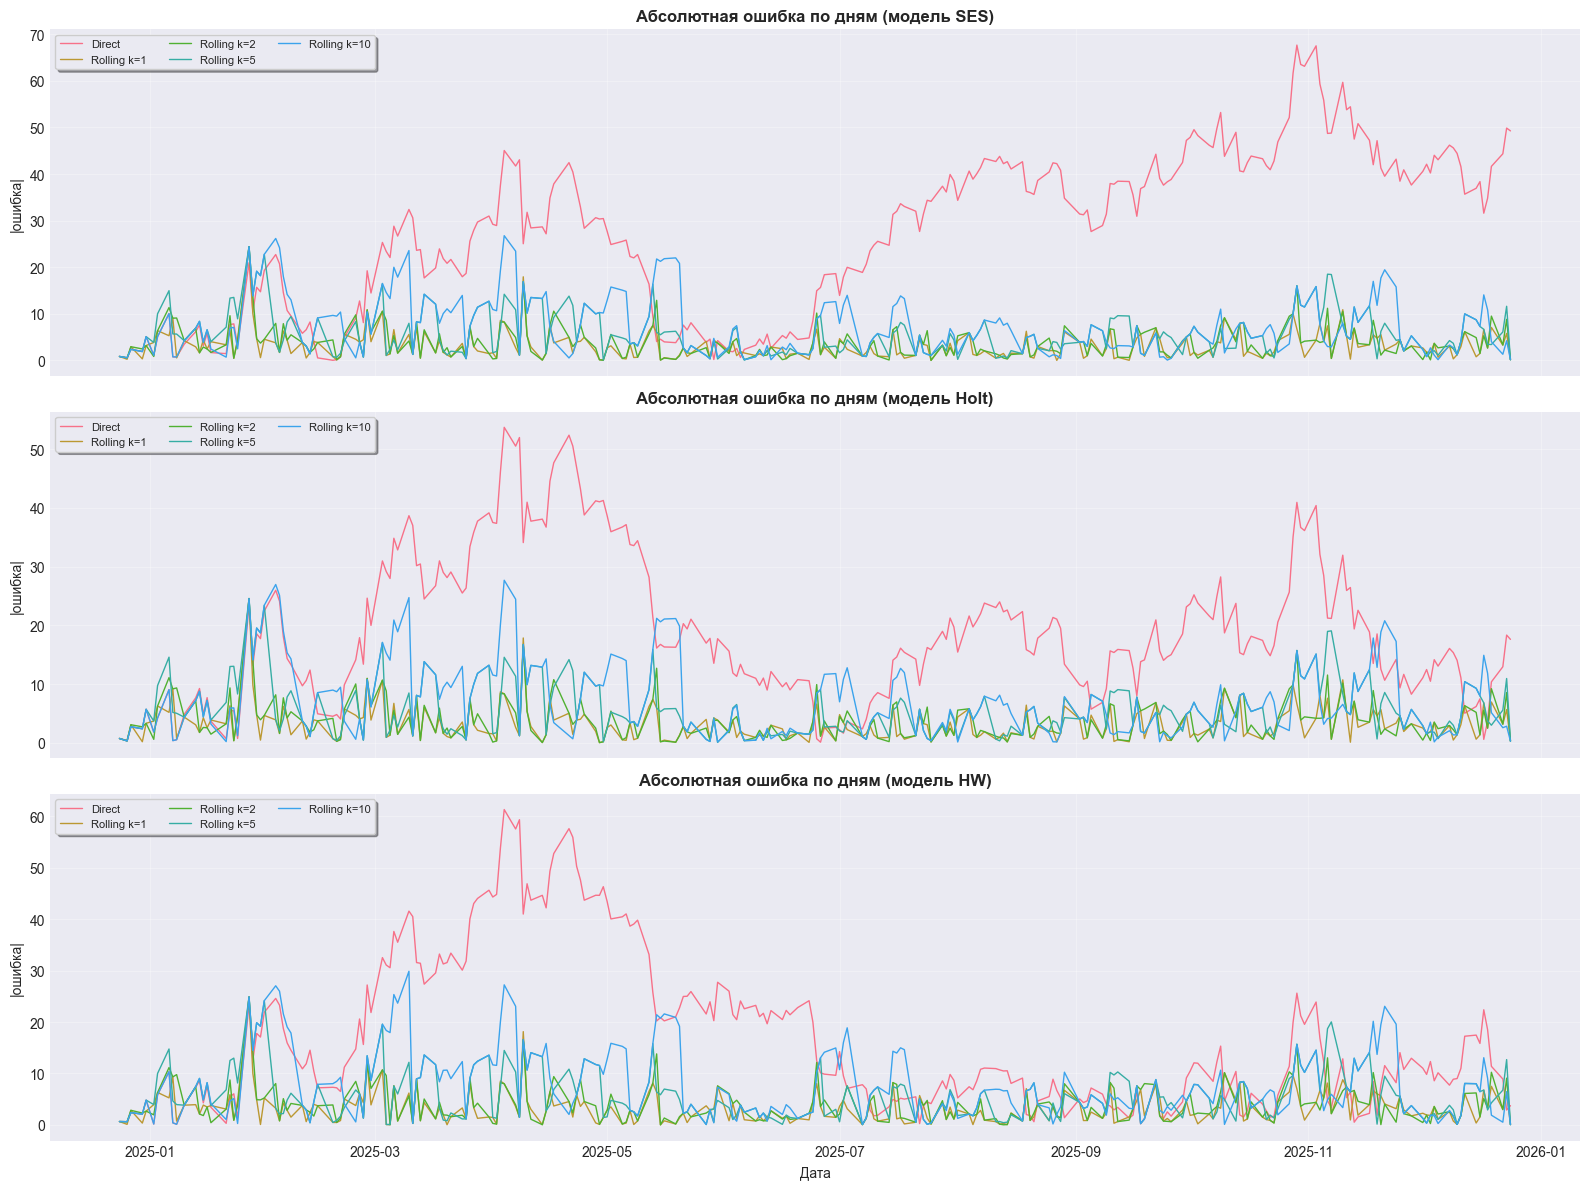

In [416]:
models = ['SES', 'Holt', 'HW']
ks = [1, 2, 5, 10]

fig, axes = plt.subplots(len(models), 1, figsize=(16, 12), sharex=True)

for ax, model in zip(axes, models):
    errors_2 = pd.DataFrame({
        'Direct':           y_test - preds_store[(model, "Direct")],
        'Rolling k=1':  y_test - preds_store[(model, "Rolling k=1")],
        'Rolling k=2':      y_test - preds_store[(model, "Rolling k=2")],
        'Rolling k=5': y_test - preds_store[(model, "Rolling k=5")],
        'Rolling k=10':     y_test - preds_store[(model, "Rolling k=10")],
    }, index=test.index)

    for col in errors_2.columns:
        ax.plot(errors_2.index, abs(errors_2[col]), label=col, linewidth=1)

    ax.set_title(f'Абсолютная ошибка по дням (модель {model})',
                 fontsize=12, fontweight='bold')
    ax.set_ylabel('|ошибка|')
    ax.grid(alpha=0.3)
    ax.legend(loc='upper left', ncol=3, frameon=True, shadow=True, fontsize=8)

axes[-1].set_xlabel('Дата')
plt.tight_layout()
plt.show()


##### Trade-off графики

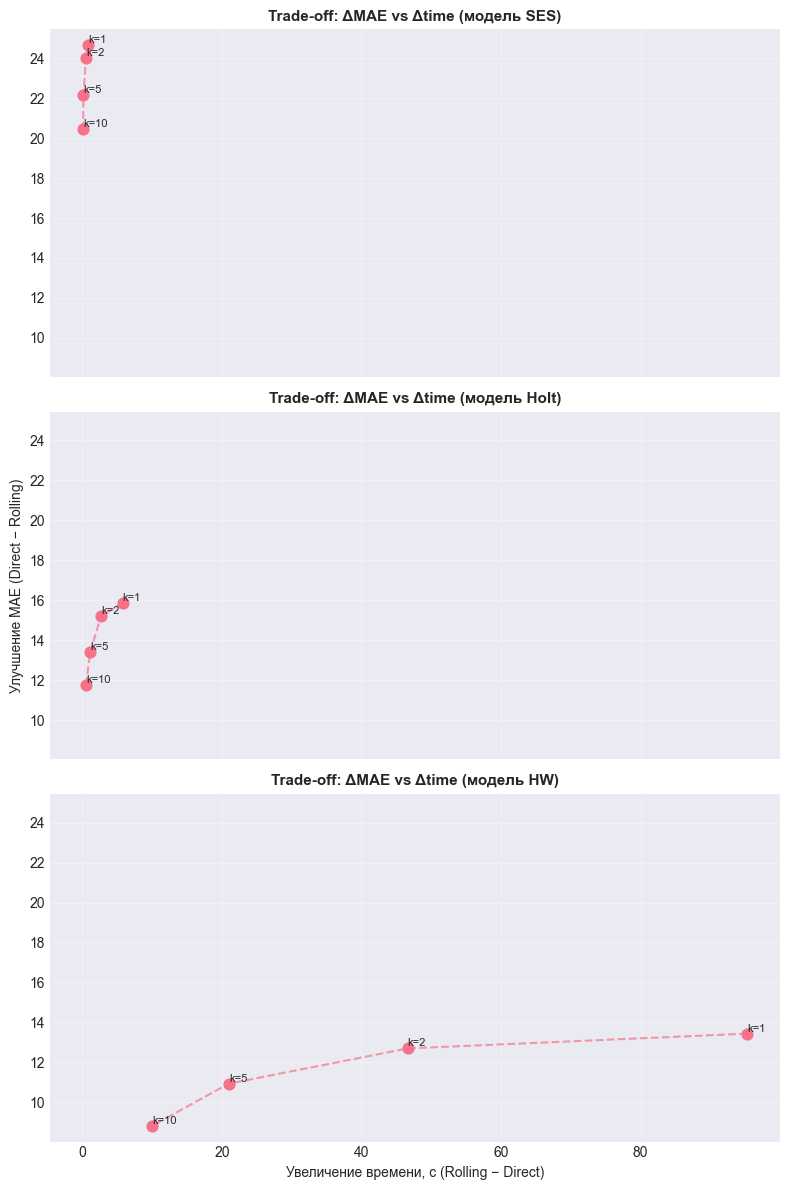

In [ ]:
models = ['SES', 'Holt', 'HW']
ks = [1, 2, 5, 10]

fig, axes = plt.subplots(len(models), 1, figsize=(8, 12), sharex=True, sharey=True)

for ax, m in zip(axes, models):
    mae_direct  = results[(m, "Direct")][0]['MAE']
    time_direct = results[(m, "Direct")][1]

    d_times = []
    d_maes  = []
    labels  = []

    for k in ks:
        mets_k, t_k = results[(m, f"Rolling k={k}")]
        mae_k = mets_k['MAE']

        dt = t_k - time_direct
        d_mae = mae_direct - mae_k

        if dt <= 0:
            continue

        d_times.append(dt)
        d_maes.append(d_mae)
        labels.append(k)

    ax.scatter(d_times, d_maes, s=60)
    ax.plot(d_times, d_maes, linestyle='--', alpha=0.7)

    for x, y, k in zip(d_times, d_maes, labels):
        ax.text(x, y, f'k={k}', fontsize=8, ha='left', va='bottom')

    ax.set_title(f'Trade-off: ΔMAE vs Δtime (модель {m})',
                 fontsize=11, fontweight='bold')
    ax.grid(alpha=0.3)

axes[-1].set_xlabel('Увеличение времени, с (Rolling − Direct)')
axes[len(models)//2].set_ylabel('Улучшение MAE (Direct − Rolling)')

plt.tight_layout()
plt.show()


### Статистический анализ

#### Значимые различия при различных k

In [429]:
models = ['SES', 'Holt', 'HW']
ks = [1, 2, 5, 10]
alpha = 0.05

print("\n=== DM-тест: Rolling(k) vs Direct ===")
for m in models:
    print(f"\nМодель: {m}")
    y = np.asarray(y_test)

    direct = np.asarray(preds_store[(m, "Direct")])

    for k in ks:
        roll = np.asarray(preds_store[(m, f"Rolling k={k}")])
        t_stat, p_val = dm_test(y, direct, roll)
        signif = "ЗНАЧИМО" if p_val < alpha else "не значимо"
        print(f"k={k}: t={t_stat:6.3f}, p={p_val:7.4f} -> {signif} (alpha={alpha})")



=== DM-тест: Rolling(k) vs Direct ===

Модель: SES
k=1: t=17.351, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)
k=2: t=17.260, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)
k=5: t=16.878, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)
k=10: t=15.835, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)

Модель: Holt
k=1: t=13.218, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)
k=2: t=13.033, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)
k=5: t=12.561, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)
k=10: t=11.742, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)

Модель: HW
k=1: t= 9.937, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)
k=2: t= 9.744, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)
k=5: t= 9.272, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)
k=10: t= 8.511, p= 0.0000 -> ЗНАЧИМО (alpha=0.05)


Ответ: из результатов тестов видно, что для всех моделей и всех периодов обучения различия между Direct `статистически значимы` при уровне значимости 0.05

#### Оптимальный период переобучения 

In [419]:
summary = []

for m in models:
    mae_direct  = results[(m, "Direct")][0]['MAE']
    time_direct = results[(m, "Direct")][1]

    best_k_ratio = None
    best_ratio = -np.inf

    for k in ks:
        mets_k, time_k = results[(m, f"Rolling k={k}")]
        mae_k = mets_k['MAE']

        d_mae  = mae_direct - mae_k
        d_time = time_k - time_direct
        ratio  = d_mae / d_time if d_time > 0 else np.nan

        if d_time > 0 and ratio > best_ratio:
            best_ratio = ratio
            best_k_ratio = k

    summary.append({
        'model': m,
        'best_k_ratio': best_k_ratio,
        'best_ratio': best_ratio,
    })

summary_df = pd.DataFrame(summary)
print("\n=== Оптимальный k с точки зрения качество/время ===")
print(summary_df)



=== Оптимальный k с точки зрения качество/время ===
  model  best_k_ratio  best_ratio
0   SES            10  165.431909
1  Holt            10   21.507248
2    HW            10    0.878302


Ответ: для всех моделей оптималным периодом переобучения является `k = 10`

#### Разница между k = 1 и k = 2

In [433]:
print("\n=== DM-тест: k=1 vs k=2 (Rolling) ===")
for m in models:
    y = np.asarray(y_test)
    roll1 = np.asarray(preds_store[(m, "Rolling k=1")])
    roll2 = np.asarray(preds_store[(m, "Rolling k=2")])

    t_stat, p_val = dm_test(y, roll1, roll2)
    signif = "ЗНАЧИМО" if p_val < alpha else "не значимо"
    print(f"{m}: t={t_stat:6.3f}, p={p_val:7.4f} -> {signif}")


=== DM-тест: k=1 vs k=2 (Rolling) ===
SES: t=-4.783, p= 0.0000 -> ЗНАЧИМО
Holt: t=-4.809, p= 0.0000 -> ЗНАЧИМО
HW: t=-4.975, p= 0.0000 -> ЗНАЧИМО


Ответ: для всех моделей p‑value ~ 0 < 0.05, значит разница между k=1 и k=2 `статистически значима`, и по знаку t‑статистики видно, что k=1 даёт меньший MSE (лучший прогноз).

### Дополнительный анализ

#### Зависимость качества от частоты обучения

In [ ]:
model = 'SES'

mae_direct = results[(model, "Direct")][0]['MAE']

mae_rolling = {}
for k in ks:
    mae_rolling[k] = results[(model, f"Rolling k={k}")][0]['MAE']

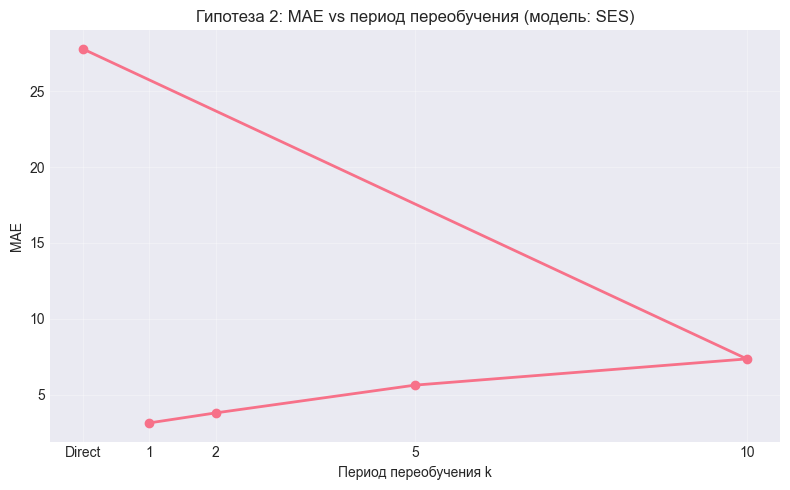

In [ ]:
k_plot = [0] + ks
mae_plot = [mae_direct] + [mae_rolling[k] for k in ks]

plt.figure(figsize=(8, 5))
plt.plot(k_plot, mae_plot, marker='o', linewidth=2)
plt.xticks(k_plot, ['Direct'] + [str(k) for k in ks])
plt.xlabel('Период переобучения k')
plt.ylabel('MAE')
plt.title(f'Гипотеза 2: MAE vs период переобучения (модель: {model})')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
diffs = {k: abs(mae_rolling[k] - mae_direct) for k in ks}
best_k = min(diffs, key=diffs.get)
print(f"Ближе всего к Direct по MAE при k = {best_k} (разница {diffs[best_k]:.4f})")

Ближе всего к Direct по MAE при k = 10 (разница 20.4361)


In [438]:
print("\nСнижение MAE относительно предыдущего k:")
prev_mae = mae_direct
ks_desc = sorted(ks, reverse=True)
prev_label = 'Direct'
for k in ks_desc:
    cur_mae = mae_rolling[k]
    improvement = prev_mae - cur_mae
    print(f"{prev_label:>7} -> k={k:>2}: ΔMAE = {improvement:.4f}")
    prev_mae = cur_mae
    prev_label = f'k={k}'


Снижение MAE относительно предыдущего k:
 Direct -> k=10: ΔMAE = 20.4361
   k=10 -> k= 5: ΔMAE = 1.7293
    k=5 -> k= 2: ΔMAE = 1.8298
    k=2 -> k= 1: ΔMAE = 0.6601


Ответ: точка убывающей отдачи `не наблюдается`

#### Вычислительная сложность

In [ ]:
model = 'HW'

time_direct = results[(model, "Direct")][1]
time_rolling = {k: results[(model, f"Rolling k={k}")][1] for k in ks}

print("Время (сек):")
print(f"Direct      : {time_direct:.4f}s")
for k in ks:
    print(f"Rolling k={k}: {time_rolling[k]:.4f}s")

Время (сек):
Direct      : 0.3381s
Rolling k=10: 10.3854s
Rolling k=5: 21.3346s
Rolling k=2: 46.9478s
Rolling k=1: 95.5664s


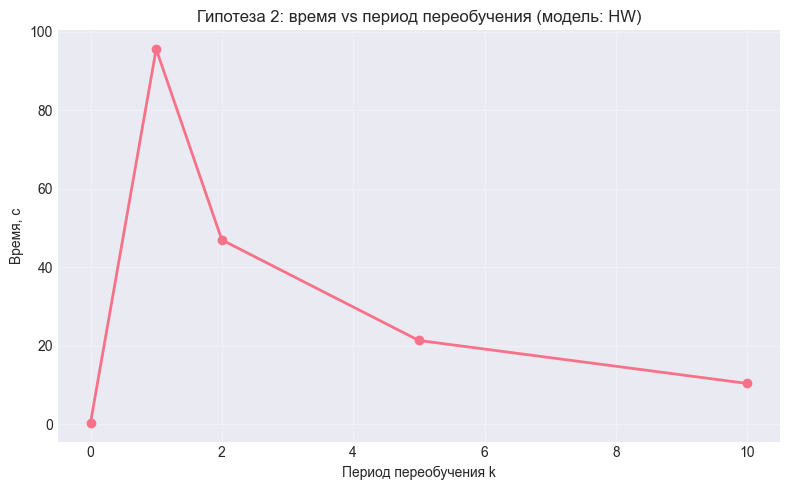

In [ ]:
k_plot = ks + [0]
time_plot = [time_rolling[k] for k in ks] + [time_direct]

plt.figure(figsize=(8, 5))
plt.plot(k_plot, time_plot, marker='o', linewidth=2)
plt.xlabel('Период переобучения k')
plt.ylabel('Время, с')
plt.title(f'Гипотеза 2: время vs период переобучения (модель: {model})')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
mae_direct = results[(model, "Direct")][0]['MAE']

print("\nСоотношение улучшение MAE / увеличение времени относительно Direct:")
for k in ks:
    mae_k = results[(model, f"Rolling k={k}")][0]['MAE']
    dt = time_rolling[k] - time_direct
    d_mae = mae_direct - mae_k
    ratio = d_mae / dt if dt > 0 else np.nan
    print(f"k={k}: ΔMAE={d_mae:.4f}, Δtime={dt:.4f}s, ratio={ratio:.4f} (MAE/сек)")


Соотношение улучшение MAE / увеличение времени относительно Direct:
k=10: ΔMAE=8.8246, Δtime=10.0473s, ratio=0.8783 (MAE/сек)
k=5: ΔMAE=10.9320, Δtime=20.9965s, ratio=0.5207 (MAE/сек)
k=2: ΔMAE=12.6955, Δtime=46.6097s, ratio=0.2724 (MAE/сек)
k=1: ΔMAE=13.4353, Δtime=95.2283s, ratio=0.1411 (MAE/сек)


#### Анализ ошибок во времени

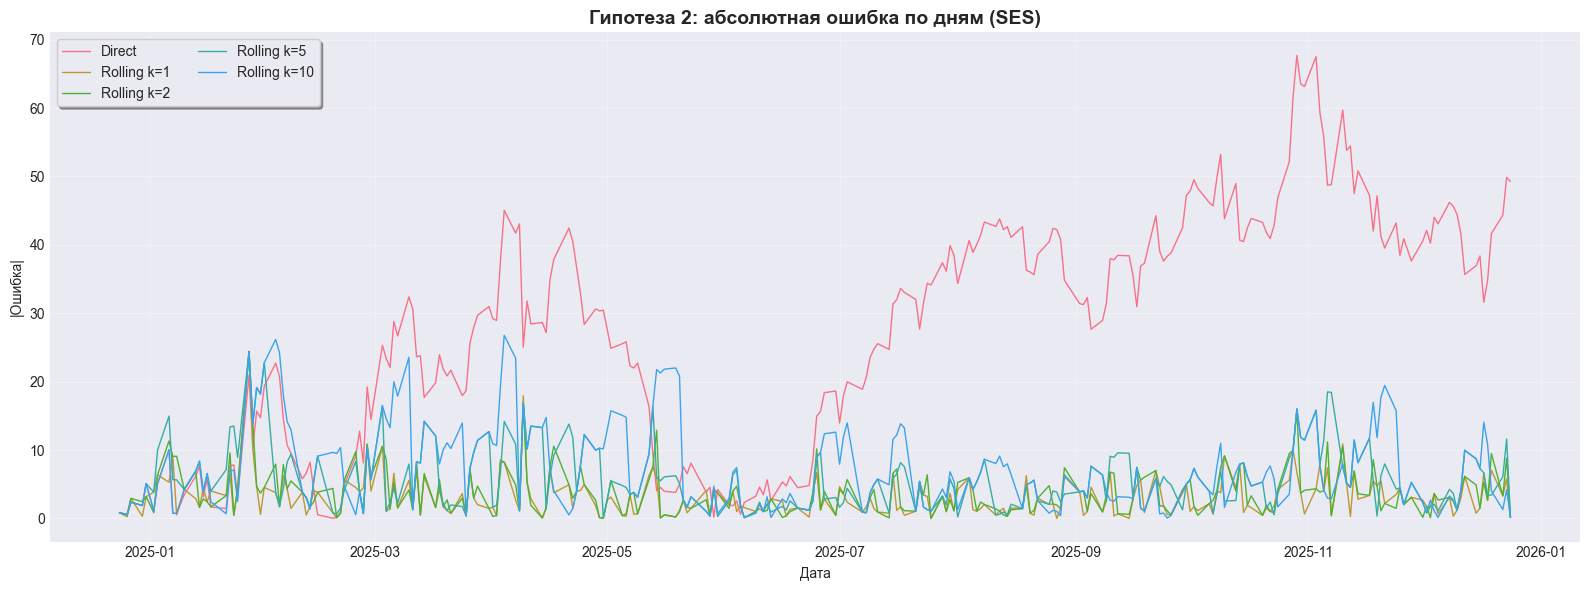

In [ ]:
model = 'SES'

abs_err = pd.DataFrame({
    'Direct':      y_test - preds_store[(model, 'Direct')],
    'Rolling k=1': y_test - preds_store[(model, 'Rolling k=1')],
    'Rolling k=2': y_test - preds_store[(model, 'Rolling k=2')],
    'Rolling k=5': y_test - preds_store[(model, 'Rolling k=5')],
    'Rolling k=10': y_test - preds_store[(model, 'Rolling k=10')],
}, index=y_test.index)

plt.figure(figsize=(16, 6))
for col in abs_err.columns:
    plt.plot(abs_err.index, abs(abs_err[col]), label=col, linewidth=1)
plt.title(f'Гипотеза 2: абсолютная ошибка по дням ({model})', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('|Ошибка|')
plt.legend(loc='upper left', ncol=2, frameon=True, shadow=True)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [407]:
direct_peaks = abs_err['Direct'].sort_values(ascending=False).head(10)
print("Топ-10 дней по абсолютной ошибке Direct:")
print(direct_peaks)

Топ-10 дней по абсолютной ошибке Direct:
Date
2025-10-29 00:00:00-04:00    67.683850
2025-11-03 00:00:00-05:00    67.523861
2025-10-30 00:00:00-04:00    63.534085
2025-10-31 00:00:00-04:00    63.134106
2025-10-28 00:00:00-04:00    61.674191
2025-11-10 00:00:00-05:00    59.694302
2025-11-04 00:00:00-05:00    59.334317
2025-11-05 00:00:00-05:00    55.854519
2025-11-12 00:00:00-05:00    54.444592
2025-11-11 00:00:00-05:00    53.804623
Name: Direct, dtype: float64


In [405]:
print("\nСравнение ошибок в днях максимума Direct:")
for date, err_d in direct_peaks.items():
    row = abs_err.loc[date]
    print(f"{date.date()}: Direct={row['Direct']:.2f}, "
          f"k=1={row['Rolling k=1']:.2f}, k=2={row['Rolling k=2']:.2f}, "
          f"k=5={row['Rolling k=5']:.2f}, k=10={row['Rolling k=10']:.2f}")


Сравнение ошибок в днях максимума Direct:
2025-10-29: Direct=67.68, k=1=6.74, k=2=16.00, k=5=16.00, k=10=16.00
2025-11-03: Direct=67.52, k=1=4.35, k=2=4.35, k=5=15.84, k=10=15.84
2025-10-30: Direct=63.53, k=1=3.71, k=2=3.71, k=5=11.85, k=10=11.85
2025-10-31: Direct=63.13, k=1=0.65, k=2=4.11, k=5=11.45, k=10=11.45
2025-10-28: Direct=61.67, k=1=9.99, k=2=9.99, k=5=9.99, k=10=9.99
2025-11-10: Direct=59.69, k=1=10.87, k=2=10.48, k=5=7.53, k=10=8.01
2025-11-04: Direct=59.33, k=1=7.89, k=2=3.84, k=5=7.89, k=10=7.65
2025-11-05: Direct=55.85, k=1=4.05, k=2=4.05, k=5=11.37, k=10=4.17
2025-11-12: Direct=54.44, k=1=0.27, k=2=4.53, k=5=4.53, k=10=4.53
2025-11-11: Direct=53.80, k=1=5.17, k=2=5.17, k=5=5.17, k=10=5.17


Ответ: 

 - Пики абсолютной ошибки Direct приходятся на дни резких движений цены.
 - В моменты резких изменений рынка стратегии с переобучением, особенно с малым k, заметно снижают максимальные ошибки по сравнению с Direct.

#### Практические рекомендации

In [ ]:
models = ['SES', 'Holt', 'HW']

summary = []

for model in models:
    mae_direct  = results[(model, "Direct")][0]['MAE']
    time_direct = results[(model, "Direct")][1]

    best_k_by_mae = None
    best_mae = mae_direct

    best_k_by_ratio = None
    best_ratio = -np.inf

    for k in ks:
        mets_k, t_k = results[(model, f"Rolling k={k}")]
        mae_k = mets_k['MAE']

        d_mae  = mae_direct - mae_k
        d_time = t_k - time_direct
        ratio  = d_mae / d_time if d_time > 0 else np.nan

        if mae_k < best_mae:
            best_mae = mae_k
            best_k_by_mae = k

        if d_time > 0 and ratio > best_ratio:
            best_ratio = ratio
            best_k_by_ratio = k

    summary.append({
        'model': model,
        'mae_direct': mae_direct,
        'best_k_mae': best_k_by_mae,
        'best_mae': best_mae,
        'best_k_ratio': best_k_by_ratio,
        'best_ratio': best_ratio,
    })

summary_df = pd.DataFrame(summary)
print(summary_df)


  model  mae_direct  best_k_mae  best_mae  best_k_ratio  best_ratio
0   SES   27.788255           1  3.132824            10  165.431909
1  Holt   18.992229           1  3.122864            10   21.507248
2    HW   16.651547           1  3.216284            10    0.878302


Ответ: 

Оптимальным с точки срения качество/время обучения является период в `k = 10 не зависимо от типа модели`